<ipython-input-47-03c44c928e6e>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


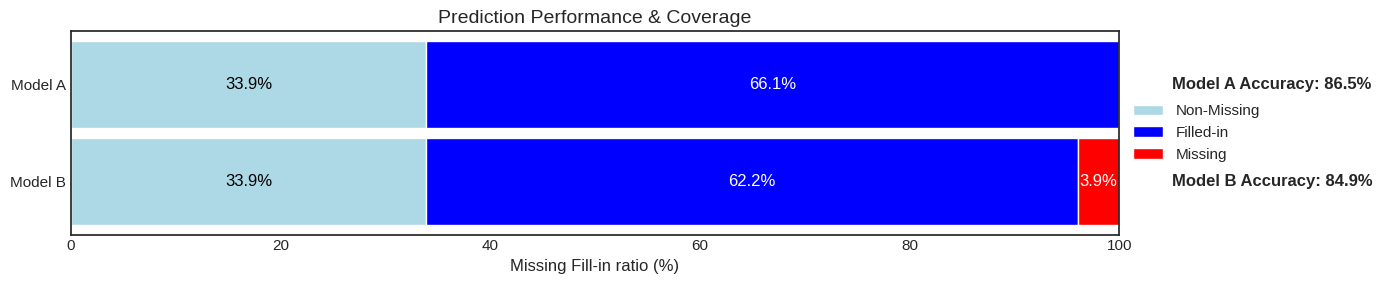

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 설정
data = {
    'Model': ['Model B', 'Model A'],
    'Accuracy (%)': [84.9, 86.5],
    'Non-Missing (%)': [33.9, 33.9],  # 기존 결측치가 없는 부분
    'Filled-in (%)': [62.2, 66.1],    # Model A: 66.1% 채워짐, Model B: 62.2% 채워짐
    'Missing (%)': [3.9, 0.0]         # Model A: 남은 결측치 0.0%, Model B: 3.9%
}

df = pd.DataFrame(data)

# Model A을 Model B보다 위에 그리도록 순서 변경
# df = df.iloc[::-1]

# 그래프 스타일 설정 (grid 제거)
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(14, 3))  # figsize를 축소하여 그래프 간격을 좁힘

# 수평 막대 그래프: Non-Missing, Filled-in, Missing (막대 두께 조정)
bar_width = 0.9  # 막대 두께를 늘려서 간격을 줄임
ax.barh(df['Model'], df['Non-Missing (%)'], label='Non-Missing', color='#ADD8E6', height=bar_width)  # 옅은 하늘색
ax.barh(df['Model'], df['Filled-in (%)'], left=df['Non-Missing (%)'], label='Filled-in', color='blue', height=bar_width)  # 파란색
ax.barh(df['Model'], df['Missing (%)'], left=df['Non-Missing (%)'] + df['Filled-in (%)'],
        label='Missing', color='red', height=bar_width)  # 빨간색

# 그래프 위에 값을 표시
for i in range(len(df)):
    # Non-Missing 부분에 텍스트 표시
    ax.text(df['Non-Missing (%)'][i] / 2, i, f'{df["Non-Missing (%)"][i]:.1f}%',
            ha='center', va='center', color='black')

    # Filled-in 부분에 텍스트 표시
    ax.text(df['Non-Missing (%)'][i] + df['Filled-in (%)'][i] / 2, i,
            f'{df["Filled-in (%)"][i]:.1f}%', ha='center', va='center', color='white')

    # Missing 부분에 텍스트 표시 (남은 결측치가 있을 경우)
    if df['Missing (%)'][i] > 0:
        ax.text(df['Non-Missing (%)'][i] + df['Filled-in (%)'][i] + df['Missing (%)'][i] / 2, i,
                f'{df["Missing (%)"][i]:.1f}%', ha='center', va='center', color='white')

# 그래프 설정
ax.set_title('Prediction Performance & Coverage', fontsize=14)
ax.set_xlim(0, 100)  # X축을 0에서 100%까지만 표시
ax.set_xlabel('Missing Fill-in ratio (%)')

# 범례를 그래프 바깥으로 설정
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# grid 제거
ax.grid(False)

# Accuracy 값을 그래프 바깥에 표시
for i in range(len(df)):
    plt.text(105, i, f'{df["Model"][i]} Accuracy: {df["Accuracy (%)"][i]:.1f}%', va='center', ha='left', fontsize=12, fontweight='bold')

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()